## Hypothesis testing

<img src="a.JPG">

### Simulating From the Null Hypothesis

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [21]:
sample_data.head()
# sampling data coffee drinker vs non coffee drinker

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?

$$H_0: \mu_{coffee-drinker} = \mu_{non-coffee-drinker}$$


$$H_1: \mu_{coffee-drinker} \neq \mu_{non-coffee-drinker}$$

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?

$$H_0: \mu_{coffee-drinker} \geq \mu_{non-coffee-drinker}$$


$$H_1: \mu_{coffee-drinker} < \mu_{non-coffee-drinker}$$

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means. 

#### Notice: Bootstrap Sampling

Sampling with replacement.Where the probabilty of any number in our set stays the same regardless of how many times it has been chosen.By boostraping we can get creation of sample distribution.

In [22]:
mean_coffee , mean_non_coffee , mean_diffs = [],[],[]

for _ in range(10000):
    bootsample = sample_data.sample(200,replace=True)
    coffee = bootsample[bootsample['drinks_coffee']==True]['height'].mean()
    non_coffee = bootsample[bootsample['drinks_coffee']==False]['height'].mean()
    mean_coffee.append(coffee)
    mean_non_coffee.append(non_coffee)
    mean_diffs.append(coffee-non_coffee)

In [23]:
np.std(mean_coffee) #  the standard deviation of the sampling distribution for coffee

0.24073763373473

In [24]:
np.std(mean_non_coffee) #  the standard deviation of the sampling distribution for non_coffee 

0.40512631277475264

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at **zero**. Also, calculate the observed sample mean difference in `sample_data`.

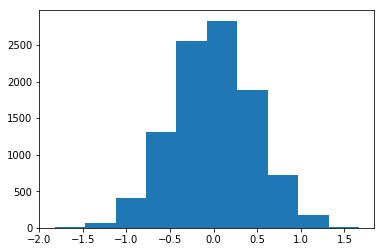

In [25]:
null_vals = np.random.normal(0, np.std(mean_diffs), 10000)
plt.hist(null_vals);